Connected to the database successfully!
Ad Campaign Performance:
          ad_name  total_sales  total_purchases
0    Holiday Sale       409.89                7
1  New Year Promo       319.92                6
2  Back to School       319.91                7


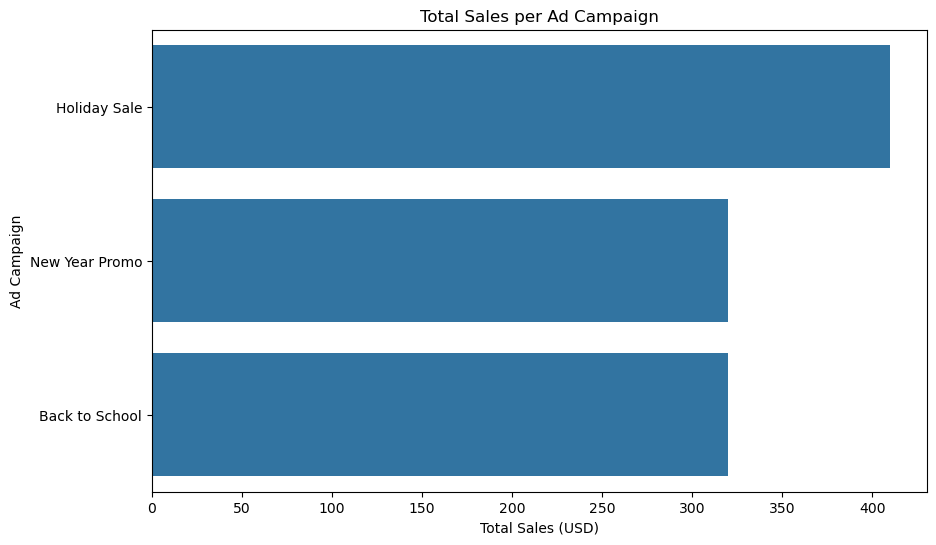

Monthly Purchase and Sales Performance:
      month  total_purchases  total_sales
0   2020-04                1        49.99
1   2020-05                1        39.99
2   2020-07                1        29.99
3   2020-09                1        49.99
4   2020-10                1        59.99
5   2020-11                1        59.97
6   2020-12                2        79.97
7   2021-07                1        99.98
8   2021-08                1        79.98
9   2021-09                1        59.98
10  2021-10                1        79.98
11  2021-11                1        59.99
12  2021-12                1        39.98
13  2022-01                1        59.99
14  2022-02                2        79.98
15  2022-03                1        39.99
16  2022-04                1        59.99
17  2022-05                1        19.99


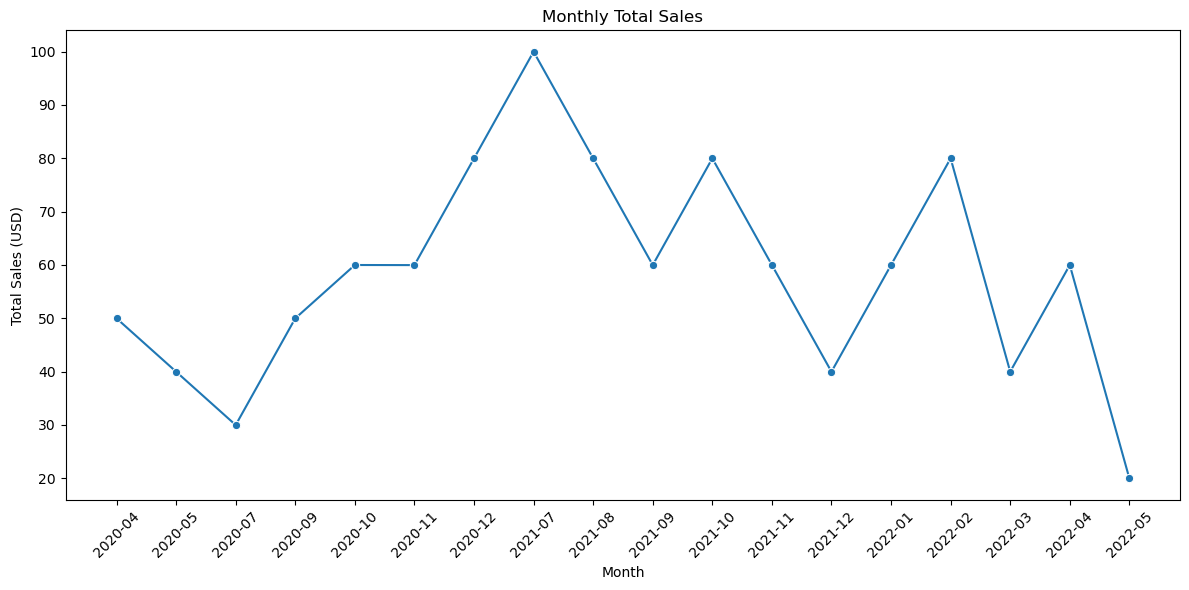

Top 10 Products by Revenue:
     product_name  total_quantity_sold  total_revenue
0       Red Dress                  5.0         249.95
1  White Sneakers                  4.0         239.96
2      Blue Jeans                  6.0         239.94
3     Green Skirt                  6.0         179.94
4   Black T-Shirt                  7.0         139.93


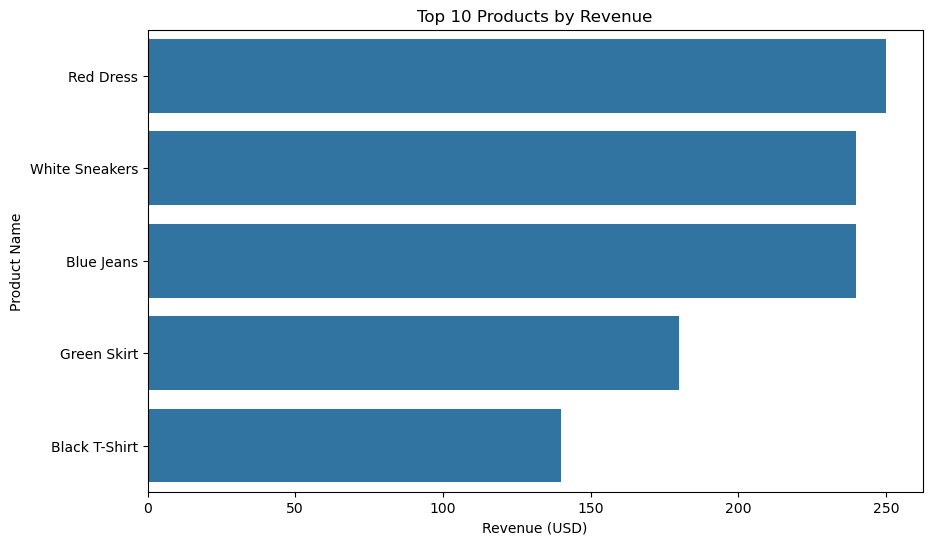

In [4]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

user = 'root'        
password = 'Olaola.12'         
host = 'localhost'             
port = '3306'                  
database = 'hauz_of_bimbo'     

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')


try:
    with engine.connect() as connection:
        print("Connected to the database successfully!")
except Exception as e:
    print("Error connecting to database:", e)
    exit() 


query_ads = """
SELECT ac.ad_name, 
       SUM(p.total_price) AS total_sales, 
       COUNT(p.purchase_id) AS total_purchases
FROM ad_campaigns ac
JOIN purchases p ON ac.ad_id = p.ad_id
GROUP BY ac.ad_name
ORDER BY total_sales DESC;
"""

ad_performance = pd.read_sql(query_ads, engine)


print("Ad Campaign Performance:")
print(ad_performance)


plt.figure(figsize=(10,6))
sns.barplot(x='total_sales', y='ad_name', data=ad_performance)
plt.title('Total Sales per Ad Campaign')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Ad Campaign')
plt.show()


query_time = """
SELECT DATE_FORMAT(purchase_date, '%%Y-%%m') AS month, 
       COUNT(purchase_id) AS total_purchases, 
       SUM(total_price) AS total_sales
FROM purchases
GROUP BY month
ORDER BY month;
"""

monthly_performance = pd.read_sql(query_time, engine)

print("Monthly Purchase and Sales Performance:")
print(monthly_performance)

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='total_sales', data=monthly_performance, marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

query_products = """
SELECT p.name AS product_name, 
       SUM(pur.quantity) AS total_quantity_sold, 
       SUM(pur.total_price) AS total_revenue
FROM products p
JOIN purchases pur ON p.product_id = pur.product_id
GROUP BY p.name
ORDER BY total_revenue DESC
LIMIT 10;
"""

top_products = pd.read_sql(query_products, engine)

print("Top 10 Products by Revenue:")
print(top_products)

plt.figure(figsize=(10,6))
sns.barplot(x='total_revenue', y='product_name', data=top_products)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Name')
plt.show()